# Построение модели мультиклассовой классификации для отзывов клиентов

> Тестовое задание для вакансии «Младший исследователь данных (DS NLP)»  

**Бизнес-кейс**  
Одним из приоритетов нашего бизнеса является создание лучшего клиентского опыта, поэтому для компании важно понимать текущий уровень `CSI` (*customer satisfaction index*) и его динамику (для оценки эффекта изменений в бизнес-процессах).

С этой целью, разработан автоматический механизм сбора обратной связи по заказам. Кроме общей оценки удовлетворённости, клиенты оставляют обратную связь в виде текстового комментария/отзыва в свободной форме.

Вам необходимо обучить модель классификации негативных отзывов, которая позволит получать детальную аналитику по проблемам клиентов в автоматическом режиме.

**Постановка задачи и оформление результатов**  
* Построить модель классификации (multiclass, 8 классов) для отзывов клиентов.  
* Для этого проведите исследование с обучением различных моделей, используя известные вам подходы. Визуализируйте промежуточные и итоговые результаты, замерьте метрики и сделайте финальные выводы.
* Работу нужно оформлять в jupyter notebook, снабдив комментариями. 
* Метрика для оценки - f1.
* Готовая модель должна быть сохранена в каком-либо формате. 
* В отдельном файле model.py должна храниться функция:
``` python
def get_result(text: pd.Series) -> pd.Series:
    pass
```
  * Функция принимает колонку с отзывами, на выходе отдаёт колонку с предсказанными классами. 
  * Колонка с классами должна иметь наименование - class_predicted. Функция должна выполнять предобработку текста (если она есть), вызывать обученную модель из файла, предсказывать классы и отдавать их.
* Также, финальная посылка результатов должна обязательно содержать файл requirements.txt с перечнем библиотек и версиями, которые вы использовали. Файл должен быть в таком виде, чтобы командой:
`pip install -r requirements.txt` устанавливались все ваши зависимости в отдельное окружение.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-первичный-осмотр-данных" data-toc-modified-id="Загрузка-и-первичный-осмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и первичный осмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-неинформативных-признаков" data-toc-modified-id="Удаление-неинформативных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление неинформативных признаков</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Среднее-количество-слов-в-отзыве" data-toc-modified-id="Среднее-количество-слов-в-отзыве-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Среднее количество слов в отзыве</a></span></li><li><span><a href="#Исследование-дисбаланса-классов" data-toc-modified-id="Исследование-дисбаланса-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование дисбаланса классов</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-нерусских-символов-и-стоп-слов" data-toc-modified-id="Удаление-нерусских-символов-и-стоп-слов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Удаление нерусских символов и стоп-слов</a></span></li><li><span><a href="#Исправление-ошибок-и-опечаток-в-тексте" data-toc-modified-id="Исправление-ошибок-и-опечаток-в-тексте-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исправление ошибок и опечаток в тексте</a></span></li><li><span><a href="#Лемматизация-текста" data-toc-modified-id="Лемматизация-текста-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Лемматизация текста</a></span></li><li><span><a href="#Облако-слов" data-toc-modified-id="Облако-слов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Облако слов</a></span></li><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-выборки-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Создание-мешка-слов-для-корпуса-отзывов" data-toc-modified-id="Создание-мешка-слов-для-корпуса-отзывов-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Создание мешка слов для корпуса отзывов</a></span></li><li><span><a href="#Вычисление-TF-IDF-для-корпуса-отзывов" data-toc-modified-id="Вычисление-TF-IDF-для-корпуса-отзывов-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Вычисление TF-IDF для корпуса отзывов</a></span></li></ul></li><li><span><a href="#Обучение-бейзлайновых-моделей" data-toc-modified-id="Обучение-бейзлайновых-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение бейзлайновых моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearSVC" data-toc-modified-id="Модель-LinearSVC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модель LinearSVC</a></span></li><li><span><a href="#Модель-SVC" data-toc-modified-id="Модель-SVC-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель SVC</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li></ul></li><li><span><a href="#Выбор-и-тестирование-лучшей-модели" data-toc-modified-id="Выбор-и-тестирование-лучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выбор и тестирование лучшей модели</a></span></li><li><span><a href="#Итоги-по-исследованию-и-список-дальнейшей-работы" data-toc-modified-id="Итоги-по-исследованию-и-список-дальнейшей-работы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги по исследованию и список дальнейшей работы</a></span></li></ul></div>

## Загрузка и первичный осмотр данных

In [36]:
import os
import re
import nltk
import time
import joblib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from spellchecker import SpellChecker
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords as nltk_stopwords
from pymystem3 import Mystem

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfVectorizer
)
from sklearn.model_selection import (
    train_test_split, GridSearchCV
)
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
# настраиваем отображение полного текста 
pd.set_option("display.max_colwidth", None)

# задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option("float_format", "{:.2f}".format)

# игнорируем предупреждения о возможных изменениях работы фуфнкций в будущих версиях
warnings.filterwarnings("ignore")

# задаем общее оформление графиков и настройки масштаба элементов
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={"figure.figsize": (12, 7)})

# настраиваем отображение графиков в ячейке с кодом, а не в новом окне
%matplotlib inline

In [38]:
# задаем повторяющуюся генерацию псевдослучайные величины на весь проект
RANDOM_STATE = 42

In [39]:
# функция для загрузки данных
def dawnload_df(local_file: str, sheet_name: str) -> pd.DataFrame:
    """Функция для загрузки данных из файла Excel.
    На вход ожидает 2 параметра:
    param:local_file - путь к локальному файлу 
    param:sheet_name - название листа.
    
    Функция проверят существование полученного пути в файловой системе.
    Если local_file ссылается на существующий путь, 
    то функция загружает данные и возвращает датасет.
    return:df_local_file - загруженный датасет
    
    В случае ошибки функция печатает сообщение об ошибке загрузки данных.
    """
    # проверяем корректность пути к локальному файлу
    if os.path.exists(local_file):
        df_local_file = pd.read_excel(local_file, sheet_name=sheet_name)
        print("Датасет успешно загружен")

        return df_local_file
    else:
        print("Ошибка при загрузке датасета. Проверь передаваемые аргументы.")

In [40]:
# сохраняем путь к файлу xlsx и название нужного листа
local_file = "C:/Users/enygi/DS/Test/M.Tex - DS NLP 2023/М.Тех_ТЗ_Датасет_DS_NLP.xlsx"
sheet_name = "Sheet1"

# загружаем данные
df_comment = dawnload_df(local_file, "Sheet1")

Датасет успешно загружен


In [41]:
# функция для первичного знакомства с данными
def df_info(df: pd.DataFrame):
    """Фукция для вывода на экран различной информации
    по датасету для первичного знакомства с данными.
    Принимает на вход датасет и выводит пять случайных наблюдений,
    общую информацию, количество уникальных значений,
    пропусков и дубликатов.
    """
    # задаем разделитель
    custom_separator = "\n\n"

    # выводим размер датасета
    print("\n\033[1mРазмер датасета \033[0m")
    print(f"Датасет состоит из {df.shape[0]} наблюдений и {df.shape[1]} признаков")

    # выводим 5 случайных наблюдений
    print("\n\033[1mПять случайных наблюдений \033[0m")
    display(df.sample(5))
    print(custom_separator)

    # выводим общую информацию
    print("\033[1mОбщая информация \033[0m")
    df.info()
    print(custom_separator)

    # выводим количество уникальных значений в каждом признаке
    print("\033[1mКоличество уникальных значений в каждом признаке \033[0m")
    display(df.nunique(axis=0))
    print(custom_separator)

    # проверяем наличие пропусков
    if df.isna().sum().sum() > 0:
        print(
            f"""\033[1mВ датасете {df.isna().sum().sum()} пропусков \033[0m
{df.isna().sum()}"""
        )
        print(custom_separator)
    else:
        print(f"\033[1mВ датасете нет пропусков \033[0m\n")

    # проверяем наличие дубликатов
    if df.duplicated().sum() > 0:
        print(f"\033[1mВ датасете {df.duplicated().sum()} дубликата \033[0m")
    else:
        print(f"\033[1mВ датасете нет дубликатов \033[0m")

In [42]:
# знакомимся с датасетом
df_info(df_comment)


Размер датасета 
Датасет состоит из 2837 наблюдений и 4 признаков

Пять случайных наблюдений 


,Unnamed: 0,id,text,class
205,205,1460,хватит навязывать покупателям дополнительные услуги и тд . я делаю покупки через приложения не для того чтобы общаться и спорить с сотрудниками магазина м видео .,Компетентность продавцов/ консультантов
624,624,3925,"один специалист на кассе, пришлось бегать по залу, искать того, кто может заказ выдать",Доступность персонала в магазине
2314,2314,14361,"никто из сотрудников не помог мне с выбором,из всех касс работала только одна и пришлось долго ждать в очереди.очень не доволен сервисом в данном магазине",Время ожидания у кассы
798,798,4872,"при получении товара как всегда нет сотрудников, пришлось долго ждать!!!",Доступность персонала в магазине
1831,1831,11386,"ужас обслуживание на преображенской площади. нахамили. приложение сделано не корректно. готов за 10000 баллов дать консультацию вашим продукт-менеджерам по улучшению. своего рода custdev. я ожидал своего заказа 20 минут в магазине, и два человека не могли отдать мне мой заказ, потому что я не могу им назвать код из смс… бред полнейший",Вежливость сотрудников магазина





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2837 non-null   int64 
 1   id          2837 non-null   int64 
 2   text        2837 non-null   object
 3   class       2837 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.8+ KB



Количество уникальных значений в каждом признаке 


Unnamed: 0    2837
id            2837
text          2822
class            8
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [43]:
# проверяем количество отзывов по всем тематикам (классам)
df_comment["class"].value_counts()

class
Компетентность продавцов/ консультантов    825
Вежливость сотрудников магазина            500
Время ожидания у кассы                     306
Доступность персонала в магазине           293
Обслуживание продавцами/ консультантами    267
Электронная очередь                        264
Обслуживание на кассе                      212
Консультация КЦ                            170
Name: count, dtype: int64

В нашем распоряжении датасет с 2837 наблюдениями, представленными 4 признаками:

* **`Unnamed: 0`** - порядковый номер наблюдения в датасете
  * данный признак не несет в себе ценной информации для модели, удалим его
  
* **`id`** - колонка нужна только для проверяющих, не используйте её в задании
  * все идентификаторы клиентов уникальны, значит в датасете нет клиентов, дважды оставивших негативный отзыв. Этот признак так же неинформативен для обучения модели и исследовательного анализа. Эта колонка понадобится для проверки, не будем ее удалять и использовать.
  
* **`text`** - текст отзыва клиента
  * всего 2822 уникальных отзывов, значит 15 текстов идентичны. После удаления порядкового номера и идентификатора клиента в датасете образуются дубликаты. Нужно будет повтроно это проверить и их удалить.  

* **`class`** - метка класса, на которую нужно обучиться
  * всего 8 уникальных классов


## Предобработка данных

### Удаление неинформативных признаков

В датасете есть 2 неинформативных для модели признака:
* порядовый номер отзыва клиента в датасете - удалим его.
* уникальный идентификатор клиента - по условию этот признак нужен для последующей проверки, удалять его не будем.


In [44]:
# удаляем столбец с порядковым номером и идентификатор клиента
df_comment.drop(["Unnamed: 0"], axis=1, inplace=True)

In [45]:
# проверяем результат
assert df_comment.shape[1] == 3
df_comment.head()

,id,text,class
0,45,негатив к вам и горячей линии которые нафиг не нужны!!! вообще ничего не решают!!!,Консультация КЦ
1,97,"перестаньте впаривать клиентам дополнительные товары и услуги, надоело стараться любезно от этих приставаний отбиваться.",Компетентность продавцов/ консультантов
2,105,"продавец предложил наклеить защитную плёнку за 1300 рублей (с учётом скидки). что сложного сказать покупателю сразу честную цену за товар (услугу)? это конечно не много, но очень не приятно!",Компетентность продавцов/ консультантов
3,127,продавец режил продать нам товар почему то по завышенной цене.,Компетентность продавцов/ консультантов
4,130,навязанные услуги ( без моего согласия) на сумму 1949 рубле,Компетентность продавцов/ консультантов


Удаление признаков прошло успешно, проверим есть ли дубликаты, если не учитывать уникальный идентификатор клиента `id`.

### Работа с дубликатами

In [46]:
# проверяем количество дубликатов
len_duplicated = df_comment.drop(["id"], axis=1).duplicated().sum()
print("Всего дубликатов до обработки:", len_duplicated)

Всего дубликатов до обработки: 15


In [47]:
# выводим дубликаты
mask = df_comment.drop(["id"], axis=1).duplicated()
df_comment[mask]

,id,text,class
173,1151,очередь на кассе,Время ожидания у кассы
1089,6726,очередь на кассе,Время ожидания у кассы
1306,8131,навязывание дополнительных услуг,Компетентность продавцов/ консультантов
1496,9322,хамское отношение персонала,Вежливость сотрудников магазина
1518,9445,хамское отношение персонала,Вежливость сотрудников магазина
1556,9652,долго ждала сотрудника,Доступность персонала в магазине
1724,10685,не в лучшую сторону внесены изменения выдачи интернет заказов. кнопка получить талон не работает. приходится диктовать сотруднику длинные номера заказов. раньше было достаточно показать штрих-код.,Электронная очередь
1774,11004,неприветливый персонал,Компетентность продавцов/ консультантов
1798,11159,некомпетентный персонал,Компетентность продавцов/ консультантов
2111,13216,хамское отношение персонала,Вежливость сотрудников магазина


Вероятность, что два разных клиента напишут одинаковый отзыв существует. При этом должна быть точно соблюдена пунктуаиция и орфография. И, как мы видим, в большинстве наблюдений такие отзывы состоят из двух-трех слов, кратко описывающих суть проблемы.

А вот то, что два разных клиента случайно написали несколько абсолютно одинаковых предложений, крайне мала. Возможно мы имеем дело с хейтерами, цель которых очернить репутацию магазина.

In [48]:
# удаляем дубликаты
df_comment.drop(["id"], axis=1).drop_duplicates(inplace=True)
print("Дубликатов после обработки:", df_comment.duplicated().sum())

Дубликатов после обработки: 0


## Исследовательский анализ данных

### Среднее количество слов в отзыве

Изучим какой объем слов оставляют клиенты в своем отзыве.  Создадим временный столбцец в датасете, в который запишем количество слов в отзыве клиента.

In [49]:
# создаем временный столбец
df_comment["count_words"] = df_comment["text"].str.split().str.len()
df_comment.head()

,id,text,class,count_words
0,45,негатив к вам и горячей линии которые нафиг не нужны!!! вообще ничего не решают!!!,Консультация КЦ,14
1,97,"перестаньте впаривать клиентам дополнительные товары и услуги, надоело стараться любезно от этих приставаний отбиваться.",Компетентность продавцов/ консультантов,14
2,105,"продавец предложил наклеить защитную плёнку за 1300 рублей (с учётом скидки). что сложного сказать покупателю сразу честную цену за товар (услугу)? это конечно не много, но очень не приятно!",Компетентность продавцов/ консультантов,29
3,127,продавец режил продать нам товар почему то по завышенной цене.,Компетентность продавцов/ консультантов,10
4,130,навязанные услуги ( без моего согласия) на сумму 1949 рубле,Компетентность продавцов/ консультантов,10


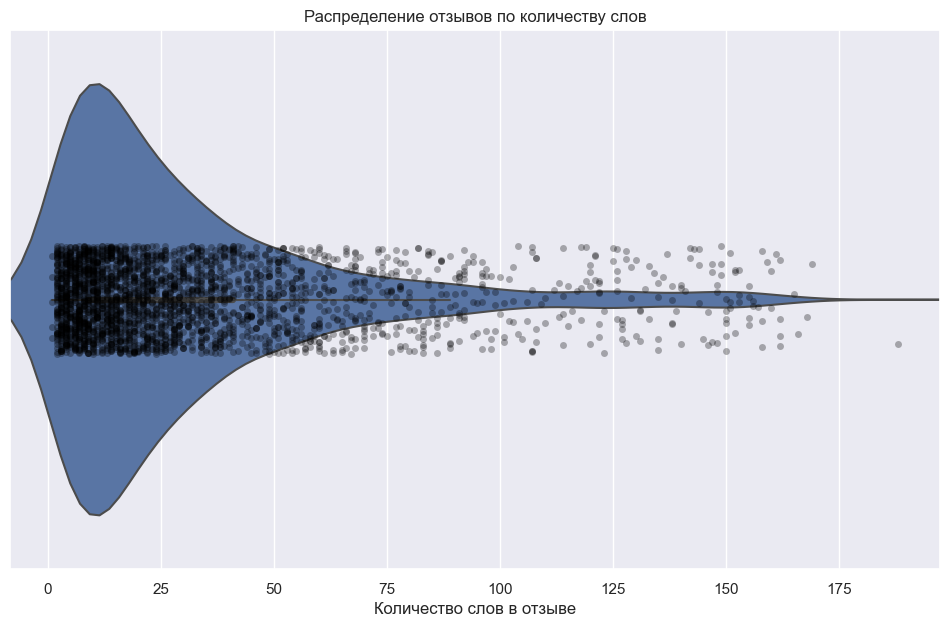

In [50]:
# строим диаграмму распределения отзывов по количеству слов
sns.violinplot(data=df_comment, x="count_words")
sns.stripplot(data=df_comment, x="count_words", color="black", alpha=0.3)

plt.xlabel("Количество слов в отзыве")
plt.title("Распределение отзывов по количеству слов")

plt.show()

In [51]:
# выводим описательную статистику
df_comment[["count_words"]].describe().T

,count,mean,std,min,25%,50%,75%,max
count_words,2837.00,31.61,32.55,1.00,9.00,21.00,41.00,188.00


In [52]:
# считаем моду
print("Мода:", df_comment["count_words"].mode()[0])

Мода: 4


In [53]:
# удаляем временный столбец с количеством слов
df_comment.drop(["count_words"], axis=1 , inplace=True)

* наиболее часто мы будем иметь дело с короткими отзывами примерно в 10 слов
* основная масса отзывов находится в диапазоне от 2 до 25 слов на отзыв
* отзывы больше 25 слов встречаются реже и по мере увеличения количества слов в отзыве, количества самих отзывов уменьшается.
* отзывы свыше 100 слов единичны
* средние показатели:
  * мода - 4 слова в отзыве
  * среднее арифметическое - 32
  * медиана - 21
  * стандартое отклонение - 33
* максимальное количество слов в отзыве - 188. Такой отзыв один.

### Исследование дисбаланса классов

По техническому заданию модель должна отнести отзыв клиента к одному из восьми классов. Изучим есть ли дисбаланс классов.

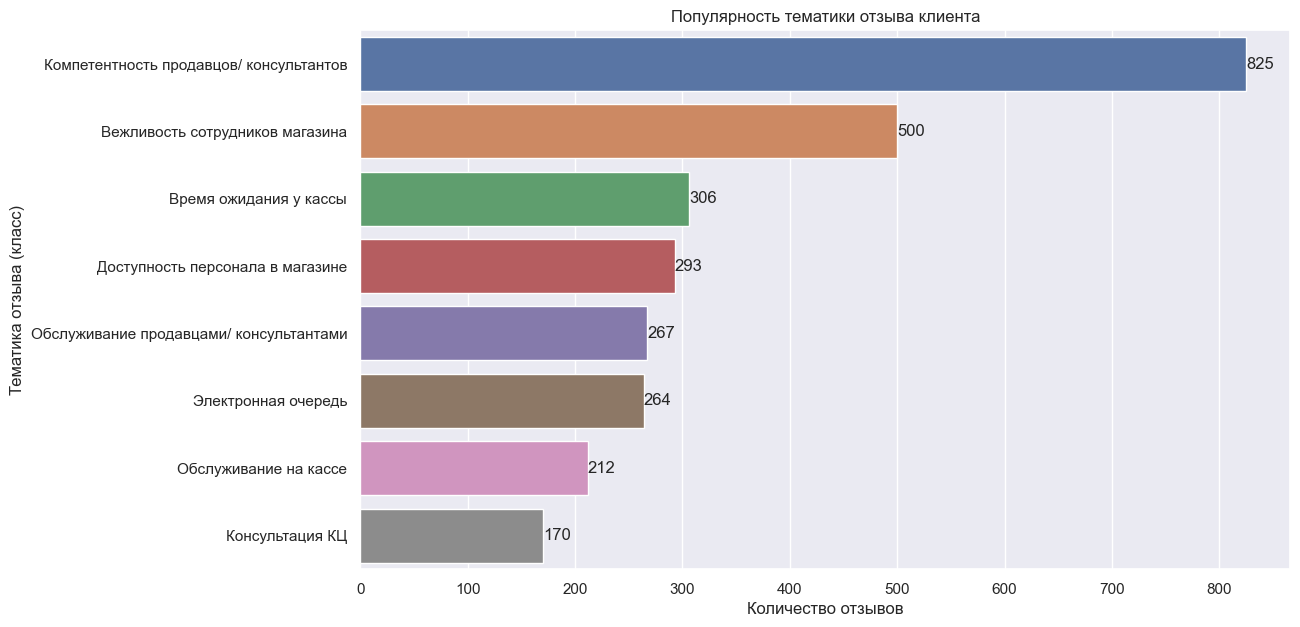

In [54]:
# визуализируем распредление классов
ax = sns.countplot(data=df_comment, y="class", order = df_comment["class"].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
    
plt.xlabel("Количество отзывов")
plt.ylabel("Тематика отзыва (класс)")
plt.title("Популярность тематики отзыва клиента")

plt.show()

* Два класса заметно выделяются по количеству отзывов. Это `"Компетентность продавцов/ консультантов"` (821 отзыв) и `"Вежливость сотрудников магазина"` (495 отзывов). 
* Следующие по популярности 4 класса не имеют такого сильного разрыва и лежат в диапазоне 263 - 304 отзыва (`"Время ожидания у кассы"` (304), `"Доступность персонала в магазине"` (291), `"Обслуживание продавцами/ консультантами"` (267), `"Электронная очередь"` (263)
* Тематика "Обслуживание на кассе" собрала 211 отзывов и заняла предпоследнее место
* Наименьше всего клиенты жаловались на "Консультацию КЦ" - всего 170 отзывов.

Такой дисбаланс может восприниматься как нормальное для бизнеса явление - где воронка клиентов шире, там и жалоб больше. 

## Подготовка данных

### Удаление нерусских символов и стоп-слов

In [55]:
# загружаем набор стоп-слов
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enygi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# загружаем русские стоп-слова
stopwords = nltk_stopwords.words("russian")

In [57]:
def clear_text(text):
    """Функция для очистки текста от лишних символов и стоп-слов.
    Функция на вход получает текст, приводит его к нижнему регистру,
    При помощи регулярного выражения ищет и созраняет только русские символы.
    Затем удаляет стоп-слова и возвращает очищенный текст.
    """
    # приводим текст к нижнему регистру
    text = text.lower()
    # оставляем только русские символы, преобразуем текст в список слов
    word_list = re.sub(r"[^а-яА-ЯёЁ ]", " ", text).split()
    # оставляем только русские символы и удаляем стоп-слова
    word_notstop_list = [w for w in word_list if w not in stopwords]
    # преобразуем очищенный список слов в текстовую строку и возвращаем результат
    return " ".join(word_notstop_list)

In [58]:
# # очищаем текст и удаляем стоп-слова
# for i in notebook.tqdm(range(len(df_comment["text"]))):
#     df_comment["clean_text"] = df_comment["text"].apply(clear_text)

In [59]:
# очищаем текст и удаляем стоп-слова
df_comment["clean_text"] = df_comment["text"].apply(clear_text)

### Исправление ошибок и опечаток в тексте

При проведении лемматизации важно, чтобы слова, по-возможности, были написаны без ошибок и опечаток - так лемма слова не исказится.

Проведем работу по поиску и исправлению ошибок и опечаток к тексте. Для поиска некорректных слов будем использовать библиотеку `SpellChecker`.

In [60]:
# функция для поиска некорректных слов
def check_text(text):
    """Функция для поиска опечаток и ошибок в словах 
    с помощью библиотеки SpellChecker.
    
    На вход функция ожидает 1 парметр:
    param:text - текст отзыва
    Полученный на вход текст выводится на экран.
    
    Функция преобразует текст в список слов, затем в цикле
    ищет слова с опечатками. Если слово корректное, то оно пропускается.
    Если нет, то на экран выводится это слово 
    и предлагаемые варианты для его исправления.
    """
    # выводим на экран полученный на вход текст
    print(text)
    # создаем объект класса и задаем русский язык
    spell = SpellChecker(language="ru")
    # преобразуем текст в список слов
    text_split = text.split()

    # сохраняем слова, в которых могут быть ошибки
    misspelled = spell.unknown(text_split)

    # проверяем слова на ошибки и выводим их на экран
    for word in misspelled:      
        if spell.correction(word) == word:
            continue
        else:
            print(f"Ошибка в написании слова {word}")
            print(f"Возможные варианты: {spell.candidates(word)}/n")

In [61]:
# проверяем текст на ошибки
# df_comment['clean_text'].apply(check_text)

Автоматическое преобразование слов с ошибками не применялось, поскольку среди слов с опечатками было много сленга, разговорной речи и других англоязычных слов. Эти слова не знакомы библиотеку `SpellChecker`, поэтому она считает их ошибочными. 

На основе полученных слов были отобраны и сохранены в словарь dict_mistakes только слова с опечатками, где в качестве значения по ключу указывалось корректное написание использованного в отзыве слова. 

In [62]:
dict_mistakes = {
    "режил": "решил",
    "рубле": "рублей",
    "преобрести": "приобрести",
    "мена": "мега",
    "разв": "раза",
    "критегию": "критерию",
    "неск": "несколько",
    "чемони": "чем они",
    "выдочи": "выдачи",
    "другова": "другого",
    "кно": "но",
    "скащали": "сказали",
    "вобще": "вообще",
    "патрачено": "потрачено",
    "еропа": "европа",
    "боее": "более",
    "впортит": "испортит",
    "навкрное": "наверное",
    "долден": "должен",
    "пукте": "пункте",
    "абсалютно": "абсолютно",
    "бпнусв": "бонусы",
    "спишитн": "спишите",
    "высатвочный": "выставочный",
    "интернетресурсах": "интернет ресурсах",
    "вчто": "что",
    "даде": "даже",
    "звенелала": "звенела",
    "всоздалось": "создалось",
    "копашашиеся": "копошащиеся",
    "закз": "заказ",
    "расдополнительно": "дополнительно",
    "пергибаешь": "перегибаешь",
    "амовитыз": "хамовитых",
    "себели": "мебели",
    "толькоодин": "только один",
    "впоходил": "походил",
    "оиложенная": "отложенная",
    "иштересоваться": "интересоваться",
    "рричину": "причину",
    "запотратив": "потратив",
    "жалобуи": "жалобу и",
    "заберал": "забирал",
    "компитентны": "компетентны",
    "пакупателей": "покупателей",
    "всеравно": "все равно",
    "шрих": "штрих",
    "притензий": "претензий",
    "прилось": "пришлось",
    "еденицу": "единицу",
    "всеё": "всё",
    "шлибы": "шли бы",
    "неподошол": "не подошел",
    "лутшебы": "лучше бы",
    "течени": "течение",
    "обслужевания": "обслуживания",
    "улутшения": "улучшения",
    "вкак": "как",
    "жто": "этот",
    "лучши": "лучший",
    "прензий": "претензий",
    "новы": "новые",
    "очен": "очень",
    "трудники": "сотрудники",
    "ооочень": "очень",
    "когад": "когда",
    "пю": "",
    "эточто": "это что",
    "чтоя": "что я",
    "вмасто": "вместо",
    "ббольше": "больше",
    "бэ": "бы",
    "раблтает": "работает",
    "взть": "взять",
    "ге": "не",
    "други": "другим",
    "чтотччасы": "что часы",
    "неслыщащие": "неслышащие",
    "ов": "в",
    "смртрите": "смотрите",
    "тутже": "тут же",
    "услышалатна": "услышала на",
    "оюбимый": "любимый",
    "хамаыатые": "хамоватые",
    "нашолся": "нашёлся",
    "хамять": "хамят",
    "периях": "перьях",
    "трубкут": "трубку",
    "поетому": "поэтому",
    "нахип": "",
    "ятобы": "якобы",
    "ветрине": "витрине",
    "вышда": "вышла",
    "заказп": "заказа",
    "товага": "товара",
    "выдаци": "выдачи",
    "виспортил": "испортил",
    "беджиками": "бейджиками",
    "раси": "",
    "вмасса": "",
    "маназин": "магазин",
    "това": "товар",
    "соответсует": "соответствует",
    "сиойке": "стойке",
    "котрый": "который",
    "видро": "видео",
    "мнеджера": "менеджера",
    "мнк": "мне",
    "откпзались": "отказались",
    "вниманияна": "внимания на",
    "грубае": "грубая",
    "табле": "табло",
    "воставил": "оставил",
    "принеаенный": "принесенный",
    "сопутсивуещего": "сопутствующего",
    "раскоплектованность": "раскомплектованность",
    "разаочень": "раза очень",
    "улыбалася": "улыбалась",
    "лдичным": "личным",
    "уселитьель": "усилитель",
    "сегнала": "сигнала",
    "стотрудник": "сотрудник",
    "вдрес": "адрес",
    "эдать": "ждать",
    "последне": "последнее",
    "спасибл": "спасибо",
    "обрашаеться": "обращается",
    "нациска": "нацистка",
    "которы": "который",
    "дезынформация": "дезинформация",
    "предлогали": "предлагали",
    "небыло": "не было",
    "помернулась": "повернулась",
    "пондравилось": "понравилось",
    "воб": "",
    "каче": "кассе",
    "подошедш": "подошел",
    "росиии": "россии",
    "хотябы": "хотя бы",
    "прийдет": "придет",
    "вбыло": "было",
    "обшаются": "общаются",
    "втора": "вторая",
    "ооооооочень": "очень",
    "балы": "баллы",
    "кс": "с",
    "безберебойную": "бесперебойную",
    "вщяла": "взяла",
    "снул": "сунул",
    "лова": "слова",
    "чес": "чем",
    "такоее": "такое",
    "расшиоенной": "расширенной",
    "бер": "берёт",
    "олна": "одна",
    "приятия": "принятия",
    "коротая": "которая",
    "зас": "с",
    "вбудто": "будто",
    "тало": "талон",
    "выдабщему": "выдавшему",
    "щанимаются": "занимаются",
    "вужасное": "ужасное",
    "мэнэджеры": "менеджеры",
    "апсолютно": "абсолютно",
    "виддео": "видео",
    "покупаьелям": "покупателям",
    "расне": "раз не",
    "операторамиивашими": "операторами вашими",
    "подлошел": "подошёл",
    "тки": "таки",
    "щаказа": "заказа",
    "ьегать": "бегать",
    "обесналичие": "обеспечить наличие",
    "вдля": "для",
    "сорону": "сторону",
    "всёравно": "всё равно",
    "чтот": "что",
    "раскокали": "рассказали",
    "бя": "",
    "автоомат": "автомат",
    "аыдачу": "выдачу",
    "автобез": "авто без",
    "пофпригодность": "профпригодность",
    "сстороны": "стороны",
    "огромнооо": "огромного",
    "сераис": "сервис",
    "вотвратительное": "отвратительное",
    "впрошу": "прошу",
    "поку": "",
    "пателей": "покупателей",
    "ис": "и",
    "корее": "скорее",
    "чтоточереди": "что очереди",
    "полеследний": "последний",
    "жлал": "ждал",
    "тои": "то и",
    "поторала": "потеряла",
    "вче": "всё",
    "мессенжере": "мессенджере",
    "вя": "я",
    "ниодного": "ни одного",
    "позвола": "позвала",
    "никакго": "никакого",
    "петешуная": "петушиная",
    "некомпитентны": "некомпетентны",
    "поодовцы": "продавцы",
    "тоаары": "товары",
    "захо": "за то",
    "сотрудрики": "сотрудники",
    "гдето": "где то",
    "побошьше": "побольше",
    "мвидио": "мвидео",
    "веся": "себя",
    "вдолжно": "должно",
    "аятый": "пятый",
    "размагнителся": "размагнитился",
    "ннаглый": "наглый",
    "размагнитететь": "размагнитить",
    "переценники": "переценили",
    "проят": "просят",
    "гегиенично": "гигиенично",
    "порасил": "попросил",
    "спнциалиста": "специалиста",
    "отпальцев": "от пальцев",
    "ламчки": "лампочки",
    "коекак": "кое как",
    "вкаждый": "каждый",
    "вно": "но",
    "хомил": "хамил",
    "совему": "своему",
    "аробивала": "пробивала",
    "пояснивь": "пояснив",
}
print(f"Длина словаря {len(dict_mistakes)} слова")

Длина словаря 233 слова


In [63]:
# функция дли исправления опечаток 
def correction_misspell(text):
    """Функция для исправления опечаток в тексте на основе 
    словаря dict_mistakes, где ключ - некорректное слово,
    а значение - его исправленная версия.
    
    На вход функция ожидает 1 парметр:
    param:text - текст отзыва
    
    Функция разделяет текст на слова и в цикле проверяет 
    наличие этого слова в словаре dict_mistakes.
    Если слово совпадает с ключем словаря, 
    то оно заменяется на значение ключа.
    По завершении цикла функция преобразует список слов с учетом исправлений
    в текстовую строку и возвращает результат.
    return:corrected_text - исправленный текст.
    """
    # преобразуем текст в список слов
    text_list = text.split()
    
    # заменяем слова с опечатками
    for index, word in enumerate(text_list):
        if word in dict_mistakes:
            text_list[index] = dict_mistakes[word]
    # преобразуем список слов в текстовую строку и возвращаем результат    
    corrected_text = " ".join(text_list)

    return corrected_text

In [64]:
# создаем новый столбец с исправленным текстом
df_comment["correction_clean_text"] = df_comment["clean_text"].apply(correction_misspell)

In [65]:
# проверяем, что слов с опечатками больше нет
assert df_comment[df_comment["correction_clean_text"].str.contains("пояснивь")].sum().sum() == 0

In [66]:
# проверяем корретность создания столбца с исправленным текстом
df_comment.head()

,id,text,class,clean_text,correction_clean_text
0,45,негатив к вам и горячей линии которые нафиг не нужны!!! вообще ничего не решают!!!,Консультация КЦ,негатив горячей линии которые нафиг нужны вообще решают,негатив горячей линии которые нафиг нужны вообще решают
1,97,"перестаньте впаривать клиентам дополнительные товары и услуги, надоело стараться любезно от этих приставаний отбиваться.",Компетентность продавцов/ консультантов,перестаньте впаривать клиентам дополнительные товары услуги надоело стараться любезно этих приставаний отбиваться,перестаньте впаривать клиентам дополнительные товары услуги надоело стараться любезно этих приставаний отбиваться
2,105,"продавец предложил наклеить защитную плёнку за 1300 рублей (с учётом скидки). что сложного сказать покупателю сразу честную цену за товар (услугу)? это конечно не много, но очень не приятно!",Компетентность продавцов/ консультантов,продавец предложил наклеить защитную плёнку рублей учётом скидки сложного сказать покупателю сразу честную цену товар услугу это очень приятно,продавец предложил наклеить защитную плёнку рублей учётом скидки сложного сказать покупателю сразу честную цену товар услугу это очень приятно
3,127,продавец режил продать нам товар почему то по завышенной цене.,Компетентность продавцов/ консультантов,продавец режил продать нам товар почему завышенной цене,продавец решил продать нам товар почему завышенной цене
4,130,навязанные услуги ( без моего согласия) на сумму 1949 рубле,Компетентность продавцов/ консультантов,навязанные услуги моего согласия сумму рубле,навязанные услуги моего согласия сумму рублей


In [68]:
# повторно очищаем текст и удаляем стоп-слова
df_comment["correction_clean_text"] = df_comment["correction_clean_text"].apply(clear_text)

На данном этапе первоначальная очистка текста проведена успешно:
* оставлены только русские символы
* удалены стоп-слова
* исправлены слова с ошибками и опечатками

Текст готов к следующему шагу - лемматизации.

### Лемматизация текста

In [69]:
def lemm_text(text):
    """Функция для лемматизации текста.
    На вход получает текст и с помощью библиотеки pymystem3
    приводит слова к начальной форме — лемме.
    Возвращает лемматизированный текст.
    """
    # создаем класс для лемматизации
    m = Mystem() 

    # лемматизируем слова с использованием pymystem3
    # джойним лемматизированные слова в текстовую строку
    lemmatized_text = " ".join(m.lemmatize(text))

    return lemmatized_text[:-2] # исключаем два последние символа конца строки "/n"

In [70]:
# лемматизируем текст
df_comment["lemm_text"] = df_comment["correction_clean_text"].apply(lemm_text)

In [71]:
# проверяем корректность создания столбца с лемматизированным текстом
df_comment.head()

,id,text,class,clean_text,correction_clean_text,lemm_text
0,45,негатив к вам и горячей линии которые нафиг не нужны!!! вообще ничего не решают!!!,Консультация КЦ,негатив горячей линии которые нафиг нужны вообще решают,негатив горячей линии которые нафиг нужны вообще решают,негатив горячий линия который нафиг нужный вообще решать
1,97,"перестаньте впаривать клиентам дополнительные товары и услуги, надоело стараться любезно от этих приставаний отбиваться.",Компетентность продавцов/ консультантов,перестаньте впаривать клиентам дополнительные товары услуги надоело стараться любезно этих приставаний отбиваться,перестаньте впаривать клиентам дополнительные товары услуги надоело стараться любезно этих приставаний отбиваться,переставать впаривать клиент дополнительный товар услуга надоедать стараться любезно этот приставание отбиваться
2,105,"продавец предложил наклеить защитную плёнку за 1300 рублей (с учётом скидки). что сложного сказать покупателю сразу честную цену за товар (услугу)? это конечно не много, но очень не приятно!",Компетентность продавцов/ консультантов,продавец предложил наклеить защитную плёнку рублей учётом скидки сложного сказать покупателю сразу честную цену товар услугу это очень приятно,продавец предложил наклеить защитную плёнку рублей учётом скидки сложного сказать покупателю сразу честную цену товар услугу это очень приятно,продавец предлагать наклеивать защитный пленка рубль учет скидка сложный сказать покупатель сразу честный цена товар услуга это очень приятно
3,127,продавец режил продать нам товар почему то по завышенной цене.,Компетентность продавцов/ консультантов,продавец режил продать нам товар почему завышенной цене,продавец решил продать нам товар почему завышенной цене,продавец решать продавать мы товар почему завышать цена
4,130,навязанные услуги ( без моего согласия) на сумму 1949 рубле,Компетентность продавцов/ консультантов,навязанные услуги моего согласия сумму рубле,навязанные услуги моего согласия сумму рублей,навязывать услуга мой согласие сумма рубль


Лемматизация текста прошла успешно. Проверим какие слова встречаются чаще.

### Облако слов

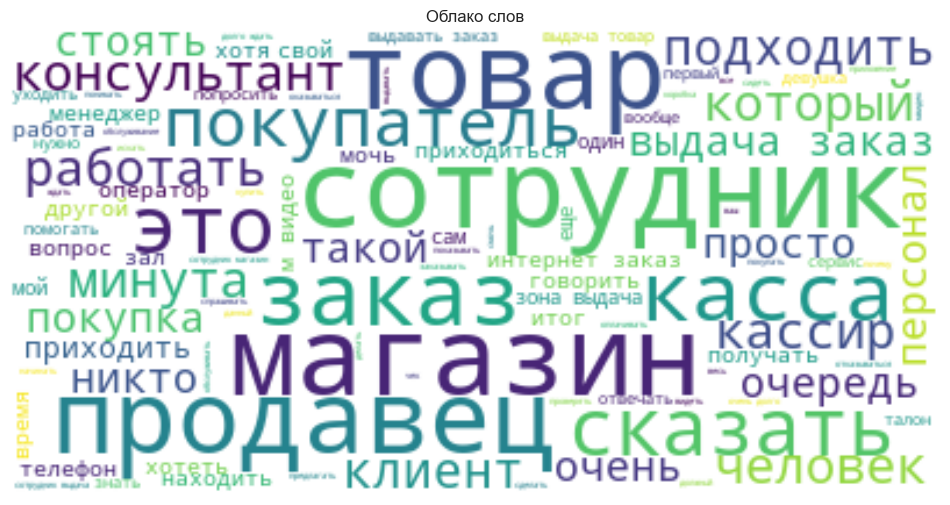

In [72]:
# облако слов лемматизированного текста
text_raw = " ".join(df_comment["lemm_text"])
wordcloud = WordCloud(
    max_font_size=50, 
    max_words=100, 
    background_color="white"
).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов")
plt.show()

Проверим как облако слов отличается в зависимости от класса.

In [73]:
# функция для построения блака слов
def word_cloud(name_class):
    """Функция на вход принимает название класса,
    делает выборку текста по нему и формирует облако слов,
    выводит на экран ТОП-10 самых часто встречаемых слов и их количество.
    
    Функция на вход ожидает 1 параметр:
    param:name_class - название класса
    """
    # формируем выборку с нужным классом
    sample_class = df_comment.loc[df_comment["class"] == name_class]
    text_raw = " ".join(sample_class["lemm_text"])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_raw)
    # создаем облако слов
    plt.figure(figsize=(7,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(name_class)
    plt.show()
    
    # токенизируем текст
    text_tokens = word_tokenize(text_raw)
    # переводим токены в текстовый формат
    text = nltk.Text(text_tokens)
    # считаем слова в тексте по популярности
    fdist = FreqDist(text)
    # формируем список ТОП-10 популярных слов
    count_top_10_words = fdist.most_common(10)
    # выводим на экран список популярных слов
    print(f'Самые популярные слова в классе "{name_class}":')
    for word in count_top_10_words:
        print(word)

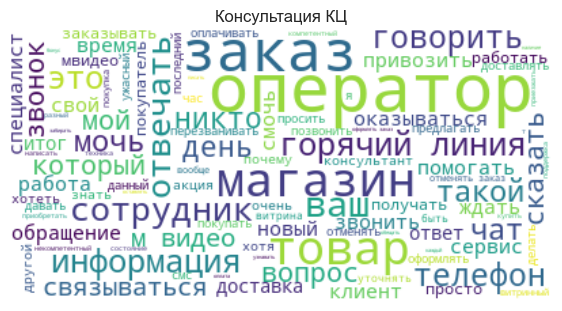

Самые популярные слова в классе "Консультация КЦ":
('оператор', 162)
('заказ', 136)
('товар', 67)
('магазин', 67)
('ваш', 36)
('сотрудник', 31)
('линия', 30)
('отвечать', 30)
('горячий', 27)
('информация', 27)


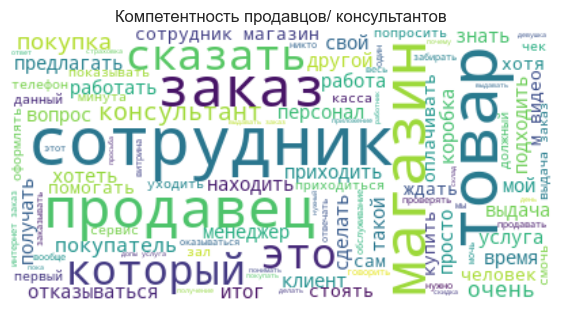

Самые популярные слова в классе "Компетентность продавцов/ консультантов":
('сотрудник', 517)
('товар', 437)
('заказ', 436)
('магазин', 415)
('продавец', 285)
('выдача', 206)
('который', 168)
('услуга', 157)
('консультант', 154)
('сказать', 144)


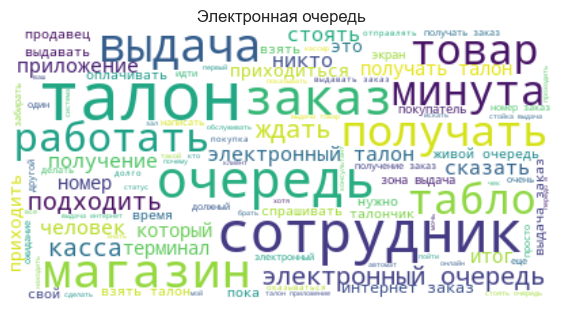

Самые популярные слова в классе "Электронная очередь":
('талон', 335)
('заказ', 247)
('очередь', 219)
('выдача', 192)
('получать', 141)
('сотрудник', 141)
('электронный', 135)
('товар', 109)
('магазин', 89)
('ждать', 88)


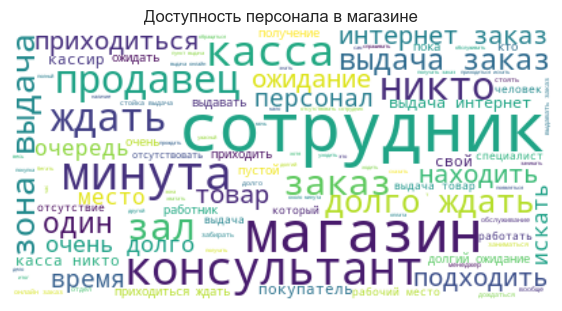

Самые популярные слова в классе "Доступность персонала в магазине":
('сотрудник', 167)
('выдача', 141)
('заказ', 134)
('магазин', 109)
('ждать', 100)
('касса', 83)
('минута', 82)
('консультант', 72)
('никто', 68)
('долго', 67)


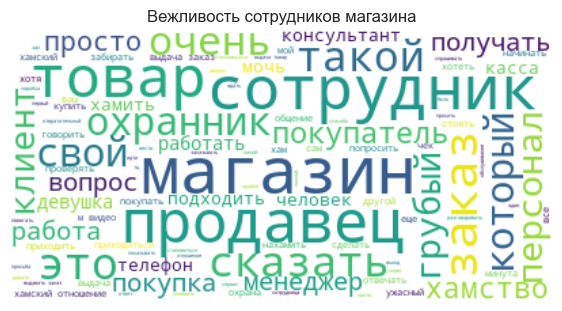

Самые популярные слова в классе "Вежливость сотрудников магазина":
('магазин', 253)
('заказ', 215)
('сотрудник', 201)
('товар', 199)
('продавец', 193)
('выдача', 120)
('отношение', 96)
('очень', 90)
('это', 89)
('хамский', 85)


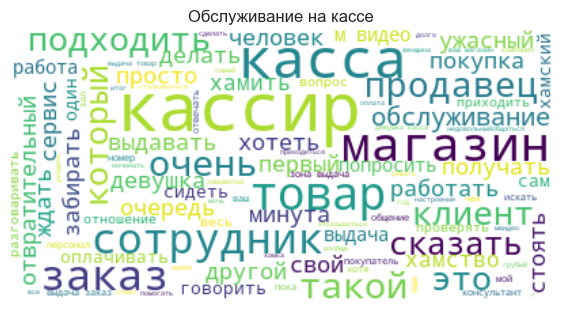

Самые популярные слова в классе "Обслуживание на кассе":
('кассир', 157)
('касса', 114)
('заказ', 88)
('магазин', 87)
('товар', 79)
('сотрудник', 56)
('выдача', 51)
('такой', 40)
('клиент', 39)
('очень', 39)


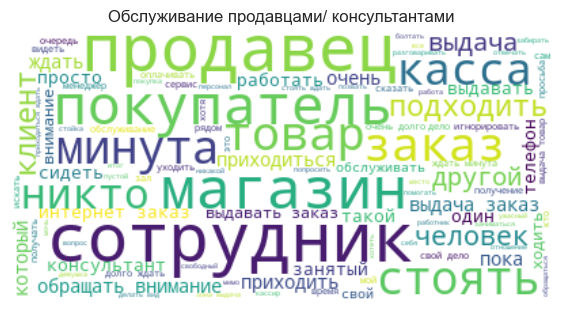

Самые популярные слова в классе "Обслуживание продавцами/ консультантами":
('заказ', 153)
('сотрудник', 145)
('продавец', 133)
('выдача', 123)
('покупатель', 105)
('магазин', 105)
('ждать', 91)
('товар', 83)
('минута', 81)
('стоять', 74)


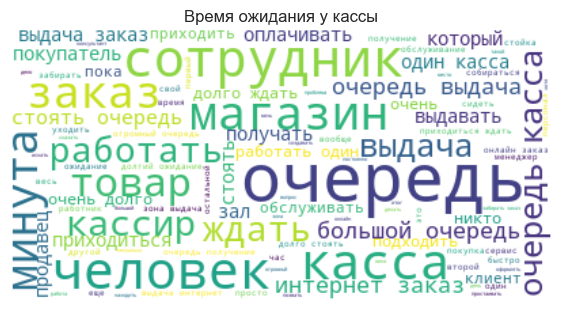

Самые популярные слова в классе "Время ожидания у кассы":
('очередь', 350)
('касса', 154)
('заказ', 145)
('выдача', 120)
('человек', 96)
('сотрудник', 95)
('магазин', 78)
('ждать', 76)
('минута', 69)
('стоять', 67)


In [74]:
# создаем список классов
categories = list(df_comment["class"].unique())

# строим облаки слов для каждого класса
for category in categories:
    word_cloud(category)

Популярность слов в зависимости от темы отзыва имеет свои отличия. Например, слово "очередь" встречается только в двух релевантных контексту классах - "Время ожидания у кассы" (350 раз) и "Электронная очередь" (219 раз).  
Слово "талон" самое популярное в классе "Электронная очередь" и больше не встречается в ТОП-10 по популярности слов в других классах.

Кроме характерной уникальности слова для соответствующего класса встречаются слова, которые вошли в ТОП-10 популярных слов во всех классах. Например, слово "сотрудник" и "магазин". Популярны также слова "товар" и "заказ".

Учитывая, что наиболее популярные слова в отзывах одни и те же, подготовка признаков с помощью мешка слов может жать слабые результаты. В данном случае неиболее рационально подготовить признаки с помощью TF-IDF.  
Сравним качество предсказаний моделей на обоих способах представления корпуса текста.

### Разделение данных на обучающую и тестовую выборки

In [75]:
# выделяем обучающий и целевой признаки
features = df_comment["lemm_text"]
target = df_comment["class"]

In [76]:
# определяем функцию для разделения данных на обучающую и тестовую выборки
def tran_test_share(features, target, test_size, stratify=None, shuffle=True):
    """Функция для разделения данных на обучающую и тестовую выборки
    методом train_test_split.

    Функция на вход ожидает 5 параметров:
    param:features - набор обучающих признаков
    param:target - целевые признаки
    param:test_size - размер тестовой выборки
    param:stratify - стратификация. По умолчанию выключена
    param:shuffle - перемешивать данные или нет. По умолчанию True
    
    Функция возвращает 4 выборки:
    return:X_train - обучающая выборка
    return:X_test - тестовая выборка
    return:y_train - целевые признаки для обучающей выборки
    return:y_test - целевые признаки для тестовой выборки
    """
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target,
        test_size=test_size,
        stratify=stratify,
        shuffle=shuffle,
        random_state=RANDOM_STATE,
    )
    return X_train, X_test, y_train, y_test

In [77]:
# делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = tran_test_share(
    features, 
    target,
    test_size=0.25,          # задаем размер тестовой выборки 25% от датасета
    stratify=target.values,  # разделяем данные стратифицированным образом с помощью меток классов
    shuffle=True             # перемешиваем данные перед разделением
)

### Создание мешка слов для корпуса отзывов

In [78]:
# инициализируем объект класса
count_vect = CountVectorizer(ngram_range=(2, 2))
data_name_count_vect = "n_gram"

# формируем мешок слов для корпуса отзывов
count_vect_train = count_vect.fit_transform(X_train)
count_vect_test = count_vect.transform(X_test)

print("Размер обучающей матрицы n_gram:", count_vect_train.shape)
print("Размер тестовой матрицы n_gram:", count_vect_test.shape)

Размер обучающей матрицы n_gram: (2127, 27915)
Размер тестовой матрицы n_gram: (710, 27915)


### Вычисление TF-IDF для корпуса отзывов

In [79]:
# инициализируем объект класса
count_tf_idf = TfidfVectorizer()
data_name_tf_idf = "tf_idf"

# считаем TF-IDF для корпуса отзывов
tf_idf_train = count_tf_idf.fit_transform(X_train)
tf_idf_test = count_tf_idf.transform(X_test)

print("Размер обучающей матрицы TF-IDF:", tf_idf_train.shape)
print("Размер тестовой матрицы TF-IDF:", tf_idf_test.shape)

Размер обучающей матрицы TF-IDF: (2127, 4638)
Размер тестовой матрицы TF-IDF: (710, 4638)


Разделение данных на обучающую и тестовую выборки прошло успешно - данные были перемешаны и разделены в пропорции 75/25 (обучающая/ тестовая соответственно).  
Корпус отзывов был подготовлен двумя способами: 
* мешок слов (n_gram) - всего получилось 27915 признака
* TF-IDF - здесь количество признаков меньше примерно в 6 раз

## Обучение бейзлайновых моделей

В качестве бейзлайновых моделей мультиклассовой классиикации попробуем простую линейную регрессию и метод опорных векторов (*Support Vector Machines — SVM*):
* `LinearSVC`
* `SVC`
* `LogisticRegression`

Для подбора гиперпараметров будем использовать *GridSearchCV*.  
В качестве метрики оценки определим *f1_micro* - она рассчитывает показатели глобально, подсчитывая общее количество истинно положительных, ложноотрицательных и ложноположительных результатов.  
Дополнительно будет замерено время обучения моделей.

Определим необходимые функции.

In [80]:
# создаем датафрейм для фиксации результатов обучения моделей
results_train_models = pd.DataFrame(columns=['model', 
                                             'data', 
                                             'f1-score', 
                                             'time'])

In [81]:
# функция для подбора лучших гиперпараметров
def grid_search(model, param, X_train, y_train):
    """Функция для подбора лучших гиперпараметров методом GridSearchCV
    с пятикратной перекрестной проверкой.
    Для поиска лучших гиперпараметров установлена метрика "f1_micro".
    Дополнительно функция замеряет время обучения модели на лучших гиперпараметрах
    и выводит его на экран.

    Функция на вход ожидает 4 параметра:
    param:model - инициализированная модель
    param:param - словарь с гиперпараметрами
    param:X_train - обучающая выборка
    param:y_train - целевые признаки для обучающей выборки
    
    Функция возвращает обученную модель и время ее обучения:
    return:trained_model - обученная модель на пободранных лучших гиперпараметрах
    return:time_train - время обучения модели на лучших гиперпараметрах
    """

    # подбираем наилучшие гиперпараметры
    grid_model = GridSearchCV(
        model,              # передаем модель
        param,              # передаем словарь с гиперпараметрами
        n_jobs=-1,          # автоматически определяет количество доступных ядер и распределяет задачи между ними
        cv=5,               # пятикратная перекрестная проверка
        scoring="f1_micro", # устанавливаем метрику 'f1_micro' для поиска наилучших гиперпараметров
    )                       # f1_micro рассчитывает показатели глобально, подсчитывая общее количество 
                            # истинно положительных, ложноотрицательных и ложноположительных результатов.
    
    # фиксируем время начала обучения
    start_train = time.time()
    
    # обучаем модель
    trained_model = grid_model.fit(X_train, y_train)
    
    # фиксируем время окончания обучения
    end_train = time.time()
    # вычисляем время обучения
    time_train = end_train - start_train
    print(f"Время обучения: {time_train}")

    return trained_model, time_train

In [82]:
# функция для преобразования секунд в формат H:M:S (часы, минуты, секунды)
def calculate_time_train(start_time, end_time):
    """Функция для преобразования количества секунд в формат H:M:S, где:
    H - часы, M - минуты, S - секунды.
    
    Функция на вход ожидает 2 параметра:
    param:start_time - время начала обучения
    param:end_time - время окончания обучения
    
    Функция вычитает из времени окончания время начала обучения, после чего 
    переводит полученное количество секунд в формат H:M:S и выводит его на экран.
    
    Функция возвращает время обучения в преобразованном формате
    return:time_train_hms - время обучения в формате H:M:S
    """
    # вычисляем время обучения в секундах
    time_train = end_time - start_time
    
    # преобразуем количество секунд в формат H:M:S
    time_train_hms = time.strftime("%H:%M:%S", time.gmtime(time_train))
    print(f"Время обучения: {time_train_hms}")
    
    return time_train_hms

In [83]:
# функция для подбора лучших гиперпараметров
def grid_search(model, model_name, param, X_train, y_train):
    """Функция для подбора лучших гиперпараметров методом GridSearchCV
    с пятикратной перекрестной проверкой.
    Для поиска лучших гиперпараметров установлена метрика "f1_micro".
    Дополнительно функция замеряет время обучения модели на лучших гиперпараметрах
    и выводит его на экран.

    Функция на вход ожидает 4 параметра:
    param:model - инициализированная модель
    param:param - словарь с гиперпараметрами
    param:X_train - обучающая выборка
    param:y_train - целевые признаки для обучающей выборки
    
    Функция возвращает обученную модель и время ее обучения:
    return:trained_model - обученная модель на пободранных лучших гиперпараметрах
    return:time_train - время обучения модели на лучших гиперпараметрах
    """
    # подбираем наилучшие гиперпараметры
    grid_model = GridSearchCV(
        model,              # передаем модель
        param,              # передаем словарь с гиперпараметрами
        n_jobs=-1,          # автоматически определяет количество доступных ядер и распределяет задачи между ними
        cv=5,               # пятикратная перекрестная проверка
        scoring="f1_micro", # устанавливаем метрику 'f1_micro' для поиска наилучших гиперпараметров
    )

    # фиксируем время начала обучения
    start_time_train = time.time()
    
    # обучаем модель
    trained_model = grid_model.fit(X_train, y_train)
    
    # фиксируем время окончания обучения
    end_time_train = time.time()
    
    # сохраняем результат работы функции calculate_time_train
    time_train = calculate_time_train(start_time_train, end_time_train)

    return trained_model, time_train

In [84]:
# функция для обучения моделей
def model_train(model, model_name, param, data_name, X_train, y_train):
    """Функция для обучения модели.
    Вызывает фнукцию grid_search для поиска лучших гиперпараметров. 
    Выводит на экран подобранные лучшие гиперпараметрам и значение целевой метрики на них
    Записывает в словарь results_train_models результаты обученной модели 
    (название модели и датасета, значение метрики f1_micro и время обучения модели).

    Функция на вход ожидает 6 параметров:
    param:model - инициализированная модель
    param:model_name - название модели
    param:param - словарь с гиперпараметрами
    param:data_name - название метода подготовки векторного представления текста
    param:X_train - обучающая выборка
    param:y_train - целевые признаки для обучающей выборки
    
    Функция возвращает обученную модель:
    return:trained_model - обученная модель на пободранных лучших гиперпараметрах
    """
    # вызываем функцию для подбора гиперпараметров
    trained_model, time_train = grid_search(model, model_name, param, X_train, y_train)
    
    # выводим на экран лучшее значение f1_micro на кросс-валидации
    best_score = round(trained_model.best_score_, 2)
    print(f"Наилучший результат f1_micro на кросс-валидации: {best_score}")

    # выводим на экран лучшие гиперпараметры
    model_best_params = trained_model.best_params_
    print(f"Лучшие гиперпараметры: {model_best_params}")
    
    # записываем результаты
    global results_train_models
    results_train_models.loc[len(results_train_models.index )] = [
        model_name, data_name, best_score, time_train
    ]
    
    return trained_model

In [85]:
# функция для тестирования модели
def fit_model(model, model_name, X_test, y_test):
    """Функция для проверки модели на тестовой выборке.
    На вход принимает обученную модель. 
    Модель предсказывает класс отзыва клиента. 
    Функция строит матрицу ошибок и выводит метрики качества классификации"""
    # предсказываем метку класса на тестовой выборке
    pred = model.predict(X_test)
    # сохраняем матрицу ошибок
    cf_matrix = confusion_matrix(y_test, pred)
        
    # строим тепловую карту матрицы ошибок
    ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt =".3g")

    ax.set_title(f"Матрица ошибок {model_name}\n")
    ax.set_xlabel("Предсказанные категории")
    ax.set_ylabel("Истинные категории")

    # настраиваем подписи данных
    # создаем упорядоченный список классов, который соответствует
    # порядку вывода в confusion_matrix
    list_class = ["Вежливость сотрудников магазина",
                  "Время ожидания у кассы",
                  "Доступность персонала в магазине", 
                  "Компетентность продавцов/ консультантов", 
                  "Консультация КЦ", 
                  "Обслуживание на кассе", 
                  "Обслуживание продавцами/ консультантами", 
                  "Электронная очередь"]
    ax.xaxis.set_ticklabels(list_class, rotation=90)
    ax.yaxis.set_ticklabels(list_class, rotation=0)

    plt.show()
    
    # выводим на экран отчет, показывающий основные показатели классификации
    print(classification_report(y_test, pred))

### Модель LinearSVC

In [86]:
# инициализируем модель LinearSVC
model_linear_svc = LinearSVC(random_state=RANDOM_STATE)
model_name_linear_svc = "LinearSVC"

# формируем словарь для подбора гиперпараметров модели LinearSVC
param_grid_linear_svc = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

**Мешок слов**

In [87]:
%%time
# обучаем модель LinearSVC (мешок слов)
trained_model_linear_svc_ngram = model_train(
    model_linear_svc,
    model_name_linear_svc,
    param_grid_linear_svc, 
    data_name_count_vect, 
    count_vect_train, 
    y_train,
)

Время обучения: 00:00:06
Наилучший результат f1_micro на кросс-валидации: 0.55
Лучшие гиперпараметры: {'C': 1}
CPU times: total: 156 ms
Wall time: 6.54 s


**TF-IDF**

In [88]:
%%time
# обучаем модель LinearSVC (TF-IDF)
trained_model_linear_svc_tf_idf = model_train(
    model_linear_svc, 
    model_name_linear_svc, 
    param_grid_linear_svc, 
    data_name_tf_idf,
    tf_idf_train, 
    y_train,
)

Время обучения: 00:00:00
Наилучший результат f1_micro на кросс-валидации: 0.79
Лучшие гиперпараметры: {'C': 1}
CPU times: total: 15.6 ms
Wall time: 826 ms


### Модель SVC

In [89]:
# инициализируем модель SVC
model_svc = SVC(
    decision_function_shape="ovr",
    break_ties=True,
    random_state=RANDOM_STATE,
)
model_name_svc = "SVC"

# формируем словарь для подбора гиперпараметров модели SVC
param_grid_svc = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "gamma": [0.0001, 0.001, 0.1, 1], 
    "kernel": ["linear", "rbf"],
}

**Мешок слов**

In [90]:
%%time
# обучаем модель SVC (TF-IDF)
trained_model_svc_ngram = model_train(
    model_svc,
    model_name_svc,
    param_grid_svc, 
    data_name_count_vect,
    count_vect_train, 
    y_train,
)

Время обучения: 00:01:06
Наилучший результат f1_micro на кросс-валидации: 0.52
Лучшие гиперпараметры: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
CPU times: total: 1.39 s
Wall time: 1min 6s


**TF-IDF**

In [91]:
%%time
# обучаем модель SVC (TF-IDF)
trained_model_svc_tf_idf = model_train(
    model_svc,
    model_name_svc,
    param_grid_svc, 
    data_name_tf_idf,
    tf_idf_train, 
    y_train,
)

Время обучения: 00:00:56
Наилучший результат f1_micro на кросс-валидации: 0.8
Лучшие гиперпараметры: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
CPU times: total: 1.19 s
Wall time: 56.4 s


### Модель LogisticRegression

In [92]:
# инициализируем модель LogisticRegression
model_lr = LogisticRegression(
    solver="liblinear",
    penalty="l2",
    class_weight="balanced", 
    random_state=RANDOM_STATE,
)
model_name_lr = "LogisticRegression"

# формируем словарь для подбора гиперпараметров модели LogisticRegression
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

**Мешок слов**

In [93]:
%%time
# обучаем модель SVC (TF-IDF)
trained_model_lr_ngram = model_train(
    model_lr,
    model_name_lr,
    param_grid_lr, 
    data_name_count_vect,
    count_vect_train, 
    y_train,
)

Время обучения: 00:00:01
Наилучший результат f1_micro на кросс-валидации: 0.55
Лучшие гиперпараметры: {'C': 10}
CPU times: total: 109 ms
Wall time: 1.9 s


**TF-IDF**

In [94]:
%%time
# обучаем модель LogisticRegression (TF-IDF)
trained_model_lr_tf_idf = model_train(
    model_lr,
    model_name_lr,
    param_grid_lr, 
    data_name_tf_idf,
    tf_idf_train,
    y_train,
)

Время обучения: 00:00:00
Наилучший результат f1_micro на кросс-валидации: 0.8
Лучшие гиперпараметры: {'C': 10}
CPU times: total: 78.1 ms
Wall time: 836 ms


## Выбор и тестирование лучшей модели

В качестве бейзлайновых моделей были обучены три линейных модели классификации (*LinearSVC*, *SVC*, *LogisticRegression*) на данных, подготовленных двумя способами - мешком слов (*n_gram*) и *TF-IDF*.  
Изучим результаты.

In [95]:
# выводим таблицу с результатами
results_train_models.sort_values(
    "f1-score", axis=0, ignore_index=True, ascending=False,
)

,model,data,f1-score,time
0,SVC,tf_idf,0.80,00:00:56
1,LogisticRegression,tf_idf,0.80,00:00:00
2,LinearSVC,tf_idf,0.79,00:00:00
3,LinearSVC,n_gram,0.55,00:00:06
4,LogisticRegression,n_gram,0.55,00:00:01
5,SVC,n_gram,0.52,00:01:06


Как и предполагалось, представление корпуса текста в виде мешка слов показало плохие результаты - метрика f1 не превышает 0.55. 

На TF-IDF обучение происходит быстрее и метрика f1 значительно выше - 0.79 у *LinearSVC* и по 0.80 у *LogisticRegression* и *SVC*. 

Протестируем обе модели на тестовой выборке.

**Тестирование модели SVC**

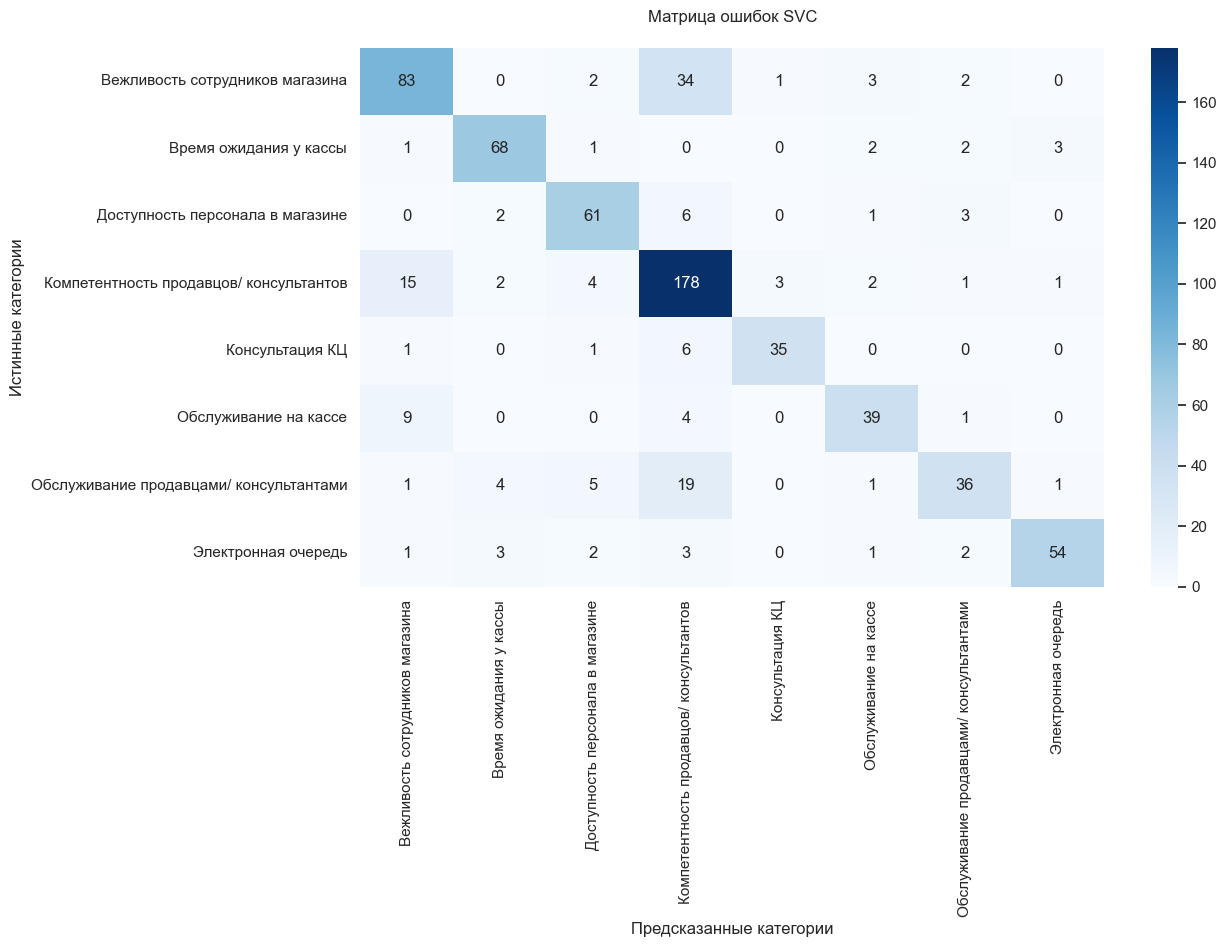

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.75      0.66      0.70       125
                 Время ожидания у кассы       0.86      0.88      0.87        77
       Доступность персонала в магазине       0.80      0.84      0.82        73
Компетентность продавцов/ консультантов       0.71      0.86      0.78       206
                        Консультация КЦ       0.90      0.81      0.85        43
                  Обслуживание на кассе       0.80      0.74      0.76        53
Обслуживание продавцами/ консультантами       0.77      0.54      0.63        67
                    Электронная очередь       0.92      0.82      0.86        66

                               accuracy                           0.78       710
                              macro avg       0.81      0.77      0.79       710
                           weighted avg       0.79      0.78      0.78       710



In [96]:
# тестируем модель SVC на тестовой выборке
fit_model(
    trained_model_svc_tf_idf, 
    model_name_svc,
    tf_idf_test, 
    y_test,
)

**Тестирование модели LogisticRegression**

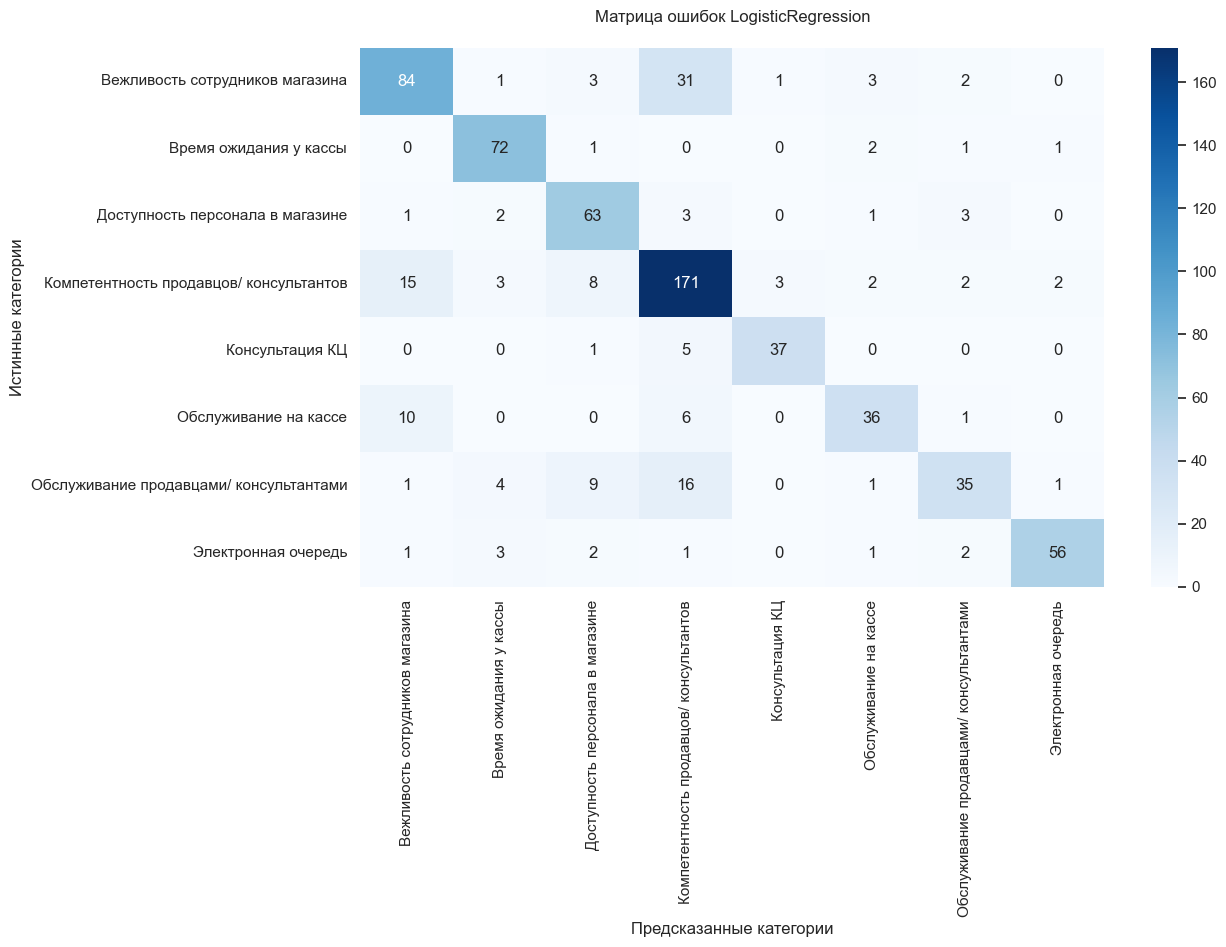

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.75      0.67      0.71       125
                 Время ожидания у кассы       0.85      0.94      0.89        77
       Доступность персонала в магазине       0.72      0.86      0.79        73
Компетентность продавцов/ консультантов       0.73      0.83      0.78       206
                        Консультация КЦ       0.90      0.86      0.88        43
                  Обслуживание на кассе       0.78      0.68      0.73        53
Обслуживание продавцами/ консультантами       0.76      0.52      0.62        67
                    Электронная очередь       0.93      0.85      0.89        66

                               accuracy                           0.78       710
                              macro avg       0.80      0.78      0.79       710
                           weighted avg       0.78      0.78      0.78       710



In [97]:
# тестируем модель LogisticRegression на тестовой выборке
fit_model(
    trained_model_lr_tf_idf, 
    model_name_lr,
    tf_idf_test, 
    y_test,
)

Обе модели одинаково ошибаются в сторону мажоритарных классов - "Компетентность продавцов/консультанстов" и "Вежливость сотрудников магазина". Это говорит о необходимости устранения дисбаланса классов.

Сравнивая две модели с одинаковым средним показателем метрики f1 предпочтение стоит отдать модели *LogisticRegression* - она немного точнее классифицировала миноритарные классы и меньше смещена в сторону мажоритарных классов. Кроме этого обучение модели логистической регрессии происходит практически мгновенно.

* лучше всего модель *LogisticRegression* показала себя на определении трех классов:
  * "Электронная очеред" - f1-score 0.89, 56 верных классификаций и 10 ошибок 
  * "Время ожидания у кассы" - f1-score 0.89, 72 верных классификаций и 5 ошибок
  * "Консультация КЦ" - f1-score 0.88, 37 верных классификаций и 6 ошибок (один раз отзыв неверно классифицирован как "Вежливость сотрудников магазина" и пять раз как "Компетентность продавцов/ консультантов", который является самым большим по количеству классов. 

* хуже всего модель справилась с одним классом: 
  * "Обслуживание продавцами/ консультантами" - f1-score 0.62. Здесь из 67 отзывов модель верно классифицировала только 35 (52%), неверно отнеся 16 отзывов к самому большому классу "Компетентность продавцов/ консультантов" и 9 отзывов отнесла к классу "Доступность персонала в магазине".

## Итоги по исследованию и список дальнейшей работы

Для решения задачи обучения модели классификации негативных отзывов, которая позволит получать детальную аналитику по проблемам клиентов в автоматическом режиме, была проведена работа по анализу датасета с негативными отзывами клиентов и построена бейзлайновая модель мультиклассовой классификации.

**Данные**  
В нашем распоряжении датасет с 2837 отзывами, из которых 15 оказались дубликатами. Необходимо отметить, что текст отзывов повторялся несколько раз, но уникальные идентификаторы `id` отличались. Проверка истории появления этих отзывов позволит понять природу появления повторяющихся отзывов и устранить возможность многократной подачи одинакового отзыва.

Было изучено среднее количество слов в отзыве:
* наиболее часто модель будет иметь дело с короткими отзывами примерно в 10 слов
* основная масса отзывов находится в диапазоне от 2 до 25 слов на отзыв
* отзывы больше 25 слов встречаются реже и по мере увеличения количества слов в отзыве, количества самих отзывов уменьшается.
* отзывы свыше 100 слов единичны
* средние показатели:
  * мода - 4 слова в отзыве
  * среднее арифметическое - 32
  * медиана - 21
  * стандартное отклонение - 33
* максимальное количество слов в отзыве - 188. Такой отзыв один.

Проведено исследование дисбаланса классов:
* Два класса заметно выделяются по количеству отзывов. Это `"Компетентность продавцов/ консультантов"` (821 отзыв) и `"Вежливость сотрудников магазина"` (495 отзывов). 
* Следующие по популярности 4 класса не имеют такого сильного разрыва и лежат в диапазоне 263 - 304 отзыва (`"Время ожидания у кассы"` (304), `"Доступность персонала в магазине"` (291), `"Обслуживание продавцами/ консультантами"` (267), `"Электронная очередь"` (263)
* Тематика "Обслуживание на кассе" собрала 211 отзывов и заняла предпоследнее место
* Наименьше всего клиенты жаловались на "Консультацию КЦ" - всего 170 отзывов.

Такой дисбаланс может восприниматься как нормальное для бизнеса явление - где воронка клиентов шире, там и жалоб больше. Однако для построения модели машинного обучения этот дисбаланс необходимо устранить.

**Подготовка данных**  
Текст отзывов был очищен - оставлены только русские символы, удалены стоп-слова.

Для проведения корректной лемматизации слов была проведена дополнительная проверка текста на наличие ошибок и опечаток.  
С помощью библиотеки `SpellChecker` были найдены некорректные слова, из которых после исключения сленговых, разговорных и англоязычных слов был составлен словарь из 233 слов с ошибками или опечатками, по которому тест был скорректирован.

После данной работы текст отзывов был лемматизирован.

Изучены облака слов по каждому классу отзывов.  
Популярность слов в зависимости от темы отзыва имеет свои отличия. Например, слово "очередь" встречается только в двух релевантных контексту классах - "Время ожидания у кассы" (350 раз) и "Электронная очередь" (219 раз).  
Слово "талон" самое популярное в классе "Электронная очередь" и больше не встречается в ТОП-10 по популярности слов в других классах.

Кроме характерной уникальности слов для соответствующего класса встречаются слова, которые вошли в ТОП-10 популярных слов во всех классах. Например, слово "сотрудник" и "магазин". Популярны также слова "товар" и "заказ" - они вошли в ТОП-10 популярных слов почти во всех классах.

**Обучающая и тестовая выборки**  
Данные были поделены на обучающую и тестовую выборки в пропорциях 75/25 соответственно. При разделении данные были стратифицированы по целевому классу, чтобы пропорции классов были сохранены и в равной мере были представлены в обучающей и тестовой выборках.

Для оценки важности слов данные были закодированы двумя способами: мешка слов (n_gram) и с помощью взвешивания слов TF-IDF.

**Обучение моделей**  
В качестве бейзлайновых моделей мультиклассовой классиикации были построены две модели на основе метода опорных векторов и простая логистическая регрессия:
* `LinearSVC`
* `SVC`
* `LogisticRegression`

Для подбора гиперпараметров использовался метод `GridSearchCV`.  
В качестве метрики оценки определим *f1_micro* - она рассчитывает показатели глобально, подсчитывая общее количество истинно положительных, ложноотрицательных и ложноположительных результатов.  
Дополнительно замерялось время обучения моделей.

Как и предполагалось, представление корпуса текста в виде мешка слов показало плохие результаты - метрика f1 не превышает 0.55. 
На TF-IDF обучение происходит быстрее и метрика f1 значительно выше - 0.79 у *LinearSVC* и по 0.80 у *LogisticRegression* и *SVC*. 

**Выбор и тестирование лучшей модели**  
Были протестированы обе модели, f1-метрика которых 0.80.

Обе модели одинаково ошибаются в сторону мажоритарных классов - "`Компетентность продавцов/консультанстов`" и "`Вежливость сотрудников магазина`". Это говорит о необходимости устранения дисбаланса классов.

Сравнивая две модели с одинаковым средним показателем метрики f1 предпочтение было отдано модели *LogisticRegression* - она немного точнее классифицировала миноритарные классы и меньше подвержена смещению в сторону мажоритарных классов. Кроме этого обучение модели логистической регрессии происходит практически мгновенно.

* лучше всего модель *LogisticRegression* показала себя на определении трех классов:
  * "`Электронная очеред`" - f1-score 0.89, 56 верных классификаций и 10 ошибок 
  * "`Время ожидания у кассы`" - f1-score 0.89, 72 верных классификаций и 5 ошибок
  * "`Консультация КЦ`" - f1-score 0.88, 37 верных классификаций и 6 ошибок (один раз отзыв неверно классифицирован как "`Вежливость сотрудников магазина`" и пять раз как "`Компетентность продавцов/ консультантов`", который является самым большим по количеству классов. 

* хуже всего модель справилась с одним классом: 
  * "`Обслуживание продавцами/ консультантами`" - f1-score 0.62. Здесь из 67 отзывов модель верно классифицировала только 35 (52%), неверно отнеся 16 отзывов к самому большому классу "`Компетентность продавцов/ консультантов`" и 9 отзывов отнесла к классу "`Доступность персонала в магазине`".

**Дальнейшая работа по совершенствованию модели**
1. Устранить дисбаланс классов. Представляется, что лучшим решением будет обогатить датасет реальными отзывами.
2. Обучить модели, потребующие большей вычислительной мощности. Например, модель BERT может показать более высокие результаты.

In [98]:
# выгрузка модели
# joblib.dump(trained_model_lr_tf_idf, "model.pkl")

# выгрузка TF-IDF
# joblib.dump(tf_idf_train, 'vectorizer.pkl', compress=True)